#### Data Manipulation

The Radar data for this project was downloaded from the CIKM 2017 competition at the link below https://tianchi.aliyun.com/competition/information.htm?raceId=231596&_lang=en_US
The solution of this notebook is inspired by the solution given by:
https://github.com/TeaPearce/precipitation-prediction-convLSTM-keras which is itself an inspiration of the paper that uses convLSTM: 
https://arxiv.org/abs/1506.04214

The data consisted of 1 training set, 2 testing sets which was 3.5GB in total when in compressed format. After uncompressing the data, the data which was stored in string format in text files came up to ~ 24GB of data. To work on the project though we need to feed the deep neural networks images - this requires to change the data to a HDF5 format which is essentially data cubes where each slice is an image. Transforming data to this format means that the images takes even more disk space. The training set would amount to > 50 GB of data with each testing set being ~ 10 GB of memory space. Below are a few functions that would transform the data from text format to the HDF5 format that is needed to train any tensorflow based model. 

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import sys
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import h5py


#### Function to just give some printing on the screen during conversion of file formats 
def fn_print(string):
	print("\n-- ", string, ": ",datetime.now().strftime('%H:%M:%S'),"--")

def fn_load_data(path_in, no_import, start_line):
	id_no = []
	label = []
	data = []

	# scan through file line by line
	with open(path_in) as infile:
		i=-1
		for line in infile:
			i+=1
			if i % 500 == 0:
				fn_print(("considering line:" + str(i)))
				#print("considering line:",i)
			if i < start_line:
				continue
			if i >= no_import + start_line:
				break
			temp = line.split(",")
			id_no.append(str(temp[0]))
			label.append(float(temp[1]))
			data_temp = temp[2].split(" ")
			# data_temp = [int(x) for x in data_temp] # prob slowest part
			data_temp = list(map(int, data_temp)) # slightly quicker
			data.append(data_temp)

	# save results
	np_id = np.array(id_no)
	np_label = np.array(label)
	np_data = np.array(data)

	# clear memory
	del id_no, label, data

	# reshape data
	np_data = np.reshape(np_data, newshape=-1)
	T,H,Y,X = 15,4,101,101
	np_data = np.reshape(np_data, newshape=(-1,T,H,Y,X), order='C')

	return np_id, np_label, np_data

## Function to append to a HDF5 file since keeping everything in memory would probably freeze computer. 
def fn_h5_append(h5f_name, name_in, data_in):
	h5f = h5py.File(h5f_name, 'a')
	h5f.create_dataset(name_in, data=data_in)
	h5f.close()

We can now convert all the files to HDF5 now by using the functions writen above. 

In [ ]:
########## converting testA to HDF5 using the functions given above
step_size = 2000
path_in = '/home/ubuntu/data_new/CIKM2017_testA/testA.txt'
h5f_name = '/home/ubuntu/data_new/CIKM2017_testA/data_testA.h5'
h5f = h5py.File(h5f_name, 'w')
grp = h5f.create_group('test_A')
h5f.close()

for i in np.arange(0,2000,step_size):

	fn_print(("convert to h5, outter loop:"+str(i)))
	np_train_id, np_train_label, np_train_data = fn_load_data(path_in, start_line=i, no_import=step_size)
	filename_id = ('/test_A/test_id_'+str(i)+"_to_"+str(i+step_size-1))
	filename_label = ('/test_A/test_label_'+str(i)+"_to_"+str(i+step_size-1))
	filename_data = ('/test_A/test_data_'+str(i)+"_to_"+str(i+step_size-1))
	ascii_id = [n.encode("ascii", "ignore") for n in np_train_id.tolist()]

	fn_h5_append(h5f_name, filename_id, ascii_id)
	fn_h5_append(h5f_name, filename_label, np_train_label)
	fn_h5_append(h5f_name, filename_data, np_train_data)

	del np_train_id, np_train_label, np_train_data


########## converting testB to HDF5
path_in = '/home/ubuntu/data_new/CIKM2017_testB/testB.txt'
h5f_name = '/home/ubuntu/data_new/CIKM2017_testB/data_testB.h5'
h5f = h5py.File(h5f_name, 'w')
grp = h5f.create_group('test_B')
h5f.close()

for i in np.arange(0,2000,step_size):

	fn_print(("convert to h5, outter loop:"+str(i)))
	np_train_id, np_train_label, np_train_data = fn_load_data(path_in, start_line=i, no_import=step_size)
	filename_id = ('/test_B/test_id_'+str(i)+"_to_"+str(i+step_size-1))
	filename_label = ('/test_B/test_label_'+str(i)+"_to_"+str(i+step_size-1))
	filename_data = ('/test_B/test_data_'+str(i)+"_to_"+str(i+step_size-1))
	ascii_id = [n.encode("ascii", "ignore") for n in np_train_id.tolist()]

	fn_h5_append(h5f_name, filename_id, ascii_id)
	fn_h5_append(h5f_name, filename_label, np_train_label)
	fn_h5_append(h5f_name, filename_data, np_train_data)

	del np_train_id, np_train_label, np_train_data


########## converting train set to HDF5 using only 4,000 samples instead of the total 10,000
step_size = 4000
path_in = '/home/ubuntu/data_new/CIKM2017_train/train.txt'
h5f_name = '/home/ubuntu/data_new/CIKM2017_train/train.h5'
h5f = h5py.File(h5f_name, 'w')
grp = h5f.create_group('train')
h5f.close()

for i in np.arange(0,4000,step_size):

	fn_print(("convert to h5, outter loop:"+str(i)))
	np_train_id, np_train_label, np_train_data = fn_load_data(path_in, start_line=i, no_import=step_size)
	filename_id = ('/train/train_id_'+str(i)+"_to_"+str(i+step_size-1))
	filename_label = ('/train/train_label_'+str(i)+"_to_"+str(i+step_size-1))
	filename_data = ('/train/train_data_'+str(i)+"_to_"+str(i+step_size-1))
	ascii_id = [n.encode("ascii", "ignore") for n in np_train_id.tolist()]

	fn_h5_append(h5f_name, filename_id, ascii_id)
	fn_h5_append(h5f_name, filename_label, np_train_label)
	fn_h5_append(h5f_name, filename_data, np_train_data)

	del np_train_id, np_train_label, np_train_data

############# creating a validation set from the training set
#### using a portion of data that does not overlap with the reduced test set. taking 500 sequencial samples
#### as the validation set.

path_in = '/home/ubuntu/data_new/CIKM2017_train/train.txt'
h5f_name = '/home/ubuntu/data_new/CIKM2017_train/val.h5'
h5f = h5py.File(h5f_name, 'w')
grp = h5f.create_group('val')
h5f.close()
step_size = 500
for i in np.arange(5000,5500,step_size):

	fn_print(("convert to h5, outter loop:"+str(i)))
	np_train_id, np_train_label, np_train_data = fn_load_data(path_in, start_line=i, no_import=step_size)
	filename_id = ('/train/val_id_'+str(i)+"_to_"+str(i+step_size-1))
	filename_label = ('/train/val_label_'+str(i)+"_to_"+str(i+step_size-1))
	filename_data = ('/train/val_data_'+str(i)+"_to_"+str(i+step_size-1))
	ascii_id = [n.encode("ascii", "ignore") for n in np_train_id.tolist()]

	fn_h5_append(h5f_name, filename_id, ascii_id)
	fn_h5_append(h5f_name, filename_label, np_train_label)
	fn_h5_append(h5f_name, filename_data, np_train_data)

	del np_train_id, np_train_label, np_train_data

We now have the data in the format we wanted, we can focus on some data preparation and the modelling part of the work.

In [2]:
#### Data loader function - use to select which HDF5 file to read and load
def fn_h5_to_np(test_train, i=0):

    if test_train == "testA":
        filename_id = ('/test_A/test_id_0_to_1999')
        filename_label = ('/test_A/test_label_0_to_1999')
        filename_data = ('/test_A/test_data_0_to_1999')
        h5f_name = '/home/ubuntu/data_new/CIKM2017_testA/data_testA.h5'
        
    elif test_train == "testB":
        filename_id = ('/test_B/test_id_0_to_1999')
        filename_label = ('/test_B/test_label_0_to_1999')
        filename_data = ('/test_B/test_data_0_to_1999')
        h5f_name = '/home/ubuntu/data_new/CIKM2017_testB/data_testB.h5'

    elif test_train == "train":
        filename_id = ('/train/train_id_0_to_3999')
        filename_label = ('/train/train_label_0_to_3999')
        filename_data = ('/train/train_data_0_to_3999')
        h5f_name = '/home/ubuntu/data_new/CIKM2017_train/train.h5'

    elif test_train == "val":
        filename_id = ('/train/val_id_5000_to_5499')
        filename_label = ('/train/val_label_5000_to_5499')
        filename_data = ('/train/val_data_5000_to_5499')
        h5f_name = '/home/ubuntu/data_new/CIKM2017_train/val.h5'

    h5f = h5py.File(h5f_name,'r')
    np_id = h5f[filename_id][:]
    np_label = h5f[filename_label][:]
    np_data = h5f[filename_data][:]
    h5f.close()
    
    return np_id, np_label, np_data



In [3]:

#setting a few global parameters that are used to scale the data
y_std = 15.
y_mean = 15.
X_std = 50.
X_mean = 60.

# normalise input and output 
def fn_norm_Xy(X,y,is_graph=False):
    # normalise X and y values
    X = X / X_std
    y = y / y_std 
    if is_graph:
        fig, (ax1,ax2) = plt.subplots(2,1)
        ax1.hist(X.reshape(-1),bins=100)
        ax2.hist(y.reshape(-1),bins=100)
    return X, y

# remove negative values in images - clipping every negative value to be zero
def fn_minus_ones(X):
    X[(X < 0)] = 0
    return X


# convert np arrays to X and y
def fn_np_to_Xy(np_data, np_label, h_select = 3, t_select = 14):
    
    X = np_data[:,t_select,h_select,:,:] # select all samples, all data
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
    
    y = np_label
    y = y.reshape(y.shape[0], 1)
    
    return X, y

# from h5 file to Xy 2D, at one height - This function is use to load data that matches radar image with
## recorded amount of rainfall
def fn_h5_to_Xy(test_train,i=0,h_select = 3, t_select = 14):
    ###### using data loader function to load data
    np_id, np_label, np_data = fn_h5_to_np(test_train=test_train,i=i) 
    X, y = fn_np_to_Xy(np_data, np_label, h_select = h_select, t_select = t_select)
    X = fn_minus_ones(X)
    X, y = fn_norm_Xy(X,y,is_graph=False) # normalise
    return X,y


# convert np arrays to X and y - 2D + timeD, at one height
def fn_np_to_Xy_2D_timeD(np_data, np_label, h_select = 3):
    X = np_data[:,:,h_select,:,:] # select all samples, all data
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], X.shape[3], 1)
    y = np_label
    y = y.reshape(y.shape[0], 1)
    
    return X, y

# from h5 file to Xy - 2D + timeD, at one height
# function to load images both for X and Y - used for next radar image prediction
def fn_h5_to_Xy_2D_timeD(test_train,i=0,h_select = 3):
    np_id, np_label, np_data = fn_h5_to_np(test_train=test_train,i=i) # load data from h5
    X, y = fn_np_to_Xy_2D_timeD(np_data, np_label, h_select = h_select) # convert to X,y format
    X = fn_minus_ones(X) 
    X, y = fn_norm_Xy(X,y,is_graph=False) # normalise
    return X,y

We now have all the tools to do the modelling. Here the work is splitted into 2 sections. First we want to predict the amount of rainfall at the desired location (centre of images) when given a sequence of radar images. The other, part of the work which is the visualisation of the radar images i.e predicting the next radar image given a sequence of images. This is carries less weight in the prediction of rainfall but gives a direct visual feedback on how good this model works. 

In [4]:
#### loading the keras libraries
from keras.models import Model
from keras.layers import Input, Dense, MaxPooling2D, MaxPooling3D, Dropout, BatchNormalization, Flatten, Conv2D, Conv3D, AveragePooling3D, LSTM, Reshape
from keras import backend as K
from keras.callbacks import History 

from keras import backend as K
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.layers import AveragePooling2D
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D



#  convLSTM model to predict the LSTM network
def fn_get_model_convLSTM_2():
    
    model = Sequential()
    
    model.add(ConvLSTM2D(filters=32, kernel_size=(7, 7),
                         input_shape=(None, 101, 101, 1),
                         return_sequences=True,
                         go_backwards=True,
                         activation='tanh', recurrent_activation='hard_sigmoid',
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.2
                         ))
    model.add(BatchNormalization())
    
    model.add(ConvLSTM2D(filters=16, kernel_size=(7, 7),
                         return_sequences=True,
                         go_backwards=True,
                         activation='tanh', recurrent_activation='hard_sigmoid',
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.2
                         ))
    model.add(BatchNormalization())
    
    model.add(ConvLSTM2D(filters=8, kernel_size=(7, 7),
                         return_sequences=False,
                         go_backwards=True,
                         activation='tanh', recurrent_activation='hard_sigmoid',
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.3, recurrent_dropout=0.2
                         ))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=1, kernel_size=(1, 1),
                   activation='relu',
                   data_format='channels_last')) 
    
    model.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='linear'))
    
    print(model.summary())

    return model


Using TensorFlow backend.


In [5]:
####### RUNNING THE MODEL

print ('loading data')
X_train, y_train = fn_h5_to_Xy_2D_timeD(test_train="train",i=0,h_select = my_height)
X_t_val, y_t_val = fn_h5_to_Xy_2D_timeD(test_train="val",i=4,h_select = my_height)

print('loading model')
model = fn_get_model_convLSTM_2()

print(model.summary())
model.compile(loss='mean_squared_error', optimizer='adam')

print('Training model')
fn_run_model(model, X_train, y_train, X_t_val, y_t_val, batch_size=8, nb_epoch=15,verbose=1,is_graph=True)

#### Evaluating the model

To evaluate the model we created, we load back the weights of the model and then send the test data to the model and get rainfall prediction. From there we use the same RMSE metric as was used in the CIKM 2017 competition to evaluate the accuracy of the model created

In [ ]:
### loading weights
model.load_weights('model_convLSTM_2_train4000_val500.h5')


### Loop to evaluate the model at each height for test set A
testA  = []
for i in range(4):
	height_rem = [0,1,2,3]
	print(i)
	del X_test
	del y_test

	my_height=height_rem[i]
	X_test, y_test = fn_h5_to_Xy_2D_timeD(test_train="testA",i=0,h_select = my_height)
	y_pred = model.predict(X_test)
	testA.append(fn_keras_rmse(y_test, y_pred).eval())
print(testA)


testA = [13.5037568326104, 13.569423492251511, 13.654292392613222, 13.208109666576338]

mean RMSE for test A = 13.48389

testB = [13.544123493977148, 13.478812867719338, 13.37080457808451, 13.08367986944559]

mean RMSE for test B = 13.36935

Overall RMSE for all the different all test data sets at all height is 

Overall RMSE = 13.43 (done by averaging all the 8 different RMSE)

This score would be ranked in the top 20 for the CIKM 2017 competition!

#### Predicting the next Radar image

As an aside to this project, one could use the same principle of convLSTM deep NN model to predict the next radar images after feeding the algorithm a sequence of images. This follows the same principle as the moving digit of MNIST challenge (http://www.cs.toronto.edu/~nitish/unsupervised_video/)

Below is the model that we settle to use for this section of the project


In [9]:
def fn_get_model_convLSTM_tframe_5():
    
    model = Sequential()
    model.add(ConvLSTM2D(filters=64, kernel_size=(7, 7),
                         input_shape=(None, 101, 101, 1), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid',
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.3, recurrent_dropout=0.3, go_backwards=True ))
    model.add(BatchNormalization())

    model.add(ConvLSTM2D(filters=32, kernel_size=(7, 7), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.3, go_backwards=True ))
    model.add(BatchNormalization())
    
    model.add(ConvLSTM2D(filters=32, kernel_size=(7, 7), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.3, go_backwards=True ))
    model.add(BatchNormalization())


    model.add(ConvLSTM2D(filters=32, kernel_size=(7, 7), padding='same', return_sequences=False, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.3, go_backwards=True ))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=1, kernel_size=(1, 1),
                   activation='sigmoid',
                   padding='same', data_format='channels_last')) 
    
    print(model.summary())
    return model

The idea here is to feed 5 images to the network and the network is suppose to predict the 6th image of the sequence. Hence the Y input to this part need to be the 6th image in any sequence. Therefore another function needs to be written that would take the training set and give a sequence of 5 images to X_input and 1 image to Y_input. The following function does that:

In [7]:
def fn_Xy_to_tframe(X_in):

    n_frames = 5
    n_frames_out = 1
    X0 = np.zeros(X_in.shape, dtype=np.float)
    X0 = X0[:,0:n_frames,:,:,:] # only use 5 frames each
    X1 = np.zeros(X_in.shape, dtype=np.float)
    X1 = X1[:,0:n_frames_out,:,:,:]
    
    for sample in range(0,X_in.shape[0]):
        
        
        X0[sample] = X_in[sample,0:n_frames,:,:,:]
        X1[sample] = X_in[sample,n_frames:n_frames+n_frames_out,:,:,:]
        
        # blur inputs
        for i in range(n_frames):
            X0[sample,i,:,:,0] = filters.gaussian_filter(X0[sample,i,:,:,0],sigma=1.8)
        for i in range(n_frames_out):
            X1[sample,i,:,:,0] = filters.gaussian_filter(X1[sample,i,:,:,0],sigma=1.8)
    
    X_max = 3.0
    X0 = np.clip(X0,0,X_max) # clip
    X1 = np.clip(X1,0,X_max)
    X0 = X0/X_max
    X1 = X1/X_max
    
    
    return X0,X1

The only problem with this function is that it only takes the first 5 images of every sequence of the training set. Each of the training set sequence are 15 images long. We therefore rewrite the same function to pick the start 5+1 (X=5, Y=1) image sequence, the middle 5+1 sequence and the last 5+1 image sequence. In this way we sample more or less the entire sequences without losing data - allowing the algorithm to generalise in principle. The following function is an extension of the above one

In [8]:
def fn_Xy_to_tframe_v2(X_in):
    
    n_frames = 5  # X frames
    n_frames_out = 1 # Y frames
    
    X0_0 = np.zeros(X_in.shape, dtype=np.float)
    X0_0 = X0_0[:,0:n_frames,:,:,:] 
    X0_1 = np.copy(X0_0)
    X0_2 = np.copy(X0_0)
    
    X1_0 = np.zeros(X_in.shape, dtype=np.float)
    X1_0 = X1_0[:,0:n_frames_out,:,:,:]
    X1_1 = np.copy(X1_0)
    X1_2 = np.copy(X1_0)
    
    for sample in range(0,X_in.shape[0]):

        X0_0[sample] = X_in[sample,0:n_frames,:,:,:]
        X0_1[sample] = X_in[sample,5:5+n_frames,:,:,:]
        X0_2[sample] = X_in[sample,9:9+n_frames,:,:,:]

        X1_0[sample] = X_in[sample,n_frames:n_frames+n_frames_out,:,:,:]
        X1_1[sample] = X_in[sample,5+n_frames:5+n_frames+n_frames_out,:,:,:]
        X1_2[sample] = X_in[sample,9+n_frames:9+n_frames+n_frames_out,:,:,:]
        
        
        for i in range(n_frames):
            X0_0[sample,i,:,:,0] = filters.gaussian_filter(X0_0[sample,i,:,:,0],sigma=1.0)
            X0_1[sample,i,:,:,0] = filters.gaussian_filter(X0_1[sample,i,:,:,0],sigma=1.0)
            X0_2[sample,i,:,:,0] = filters.gaussian_filter(X0_2[sample,i,:,:,0],sigma=1.0)
        for i in range(n_frames_out):
            X1_0[sample,i,:,:,0] = filters.gaussian_filter(X1_0[sample,i,:,:,0],sigma=1.0)
            X1_1[sample,i,:,:,0] = filters.gaussian_filter(X1_1[sample,i,:,:,0],sigma=1.0)
            X1_2[sample,i,:,:,0] = filters.gaussian_filter(X1_2[sample,i,:,:,0],sigma=1.0)
    
    X_max = 3.0
    X0_0 = np.clip(X0_0,0,X_max) # clip
    X0_1 = np.clip(X0_1,0,X_max)
    X0_2 = np.clip(X0_2,0,X_max)

    X1_0 = np.clip(X1_0,0,X_max)
    X1_1 = np.clip(X1_1,0,X_max)
    X1_2 = np.clip(X1_2,0,X_max)

    X0_0 = X0_0/X_max
    X0_1 = X0_1/X_max
    X0_2 = X0_2/X_max

    X1_0 = X1_0/X_max
    X1_1 = X1_1/X_max
    X1_2 = X1_2/X_max    
    
    ### combining all 3 arrays together
    X0 = np.copy(X0_0)
    X0 = np.concatenate((X0,X0_1,X0_2),axis=1)

    X1 = np.copy(X1_0)
    X1 = np.concatenate((X1,X1_1,X1_2),axis=1)
    return X0,X1

By using this method instead of having 4000 sequences (from the 4000 training samples) we get 12000 image sequences.
To properly randomise the input to the algorithm, sklearn shuffle is used. 

The following code was run to train the algorithm at all the heights of the radar images

In [ ]:
for i in range(0,4):

	print ('loading data')
	my_height = i
	X_train, y_train = fn_h5_to_Xy_2D_timeD(test_train="train",i=0,h_select = my_height)
	X_t_val, y_t_val = fn_h5_to_Xy_2D_timeD(test_train="val",i=4,h_select = my_height)

	X0_train, X1_train = fn_Xy_to_tframe_v2(X_train)
	X0_t_val, X1_t_val = fn_Xy_to_tframe_v2(X_t_val)

	print('Shuffling')
	X0_train, X1_train = shuffle(X0_train, X1_train, random_state=0)
	X0_t_val, X1_t_val = shuffle(X0_t_val, X1_t_val, random_state=0)

	print('loading model')
	model = fn_get_model_convLSTM_tframe_5()

	print(model.summary())
	#model.compile(loss='binary_crossentropy', optimizer='adam')
	#model.compile(loss='mean_squared_error', optimizer='adam')
	model.compile(loss=fn_keras_rmse, optimizer='adam')

	print('Training model')
	fn_run_model(model, X0_train, X1_train[:,0,:,:,:], X0_t_val, X1_t_val[:,0,:,:,:], batch_size=10, nb_epoch=3,verbose=1,is_graph=True)
	model.save_weights("model_convLSTM_tframe5_train4000_val500_height"+str(i)+"gauss_1_mse.h5")


From the results we can create a little animation of the predicted motion of clouds. This is done using the code below

In [ ]:
import matplotlib.animation as animation

input_frames = 5
s_select = 0
output_frames = 10
X_input = X0_train[s_select,:input_frames, :, :, :]
X_input1 = np.zeros((X_input.shape[0]+output_frames,X_input.shape[1],X_input.shape[2],X_input.shape[3]),float)
X_input1[0:5] = X_input
for i in range(0,output_frames):
	print(i)
	X_pred = model.predict(X_input1[i:i+5,:,:,:].reshape(1,5,101,101,1)) # predict
	X_input1[5+i] = X_pred[0,:,:,:]

fig = plt.figure()
ims = []; title = []
for i in range(10):
    im = plt.imshow(X_input1[i,:,:,0], animated=True)
    title = plt.title('Frame %f' % (i))
    ims.append([im,title])
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True)
#ani.save("movie.gif", writer='imagemagick')
plt.show()

![SegmentLocal](Prediction0_Height2.gif "segment")

Below is a comparison between the real frame and the predicted frames. Do keep in mind that Prediction frame 1 uses 5 real observations (not shown here) to be generated and hence is the most accurate. Prediction Frame 2 uses 4 real images and prediction frame 1 to make a prediction adn prediction frame 3 uses the 2 previous predicted frames. Hence the error is propagated leading to more divergence from reality.

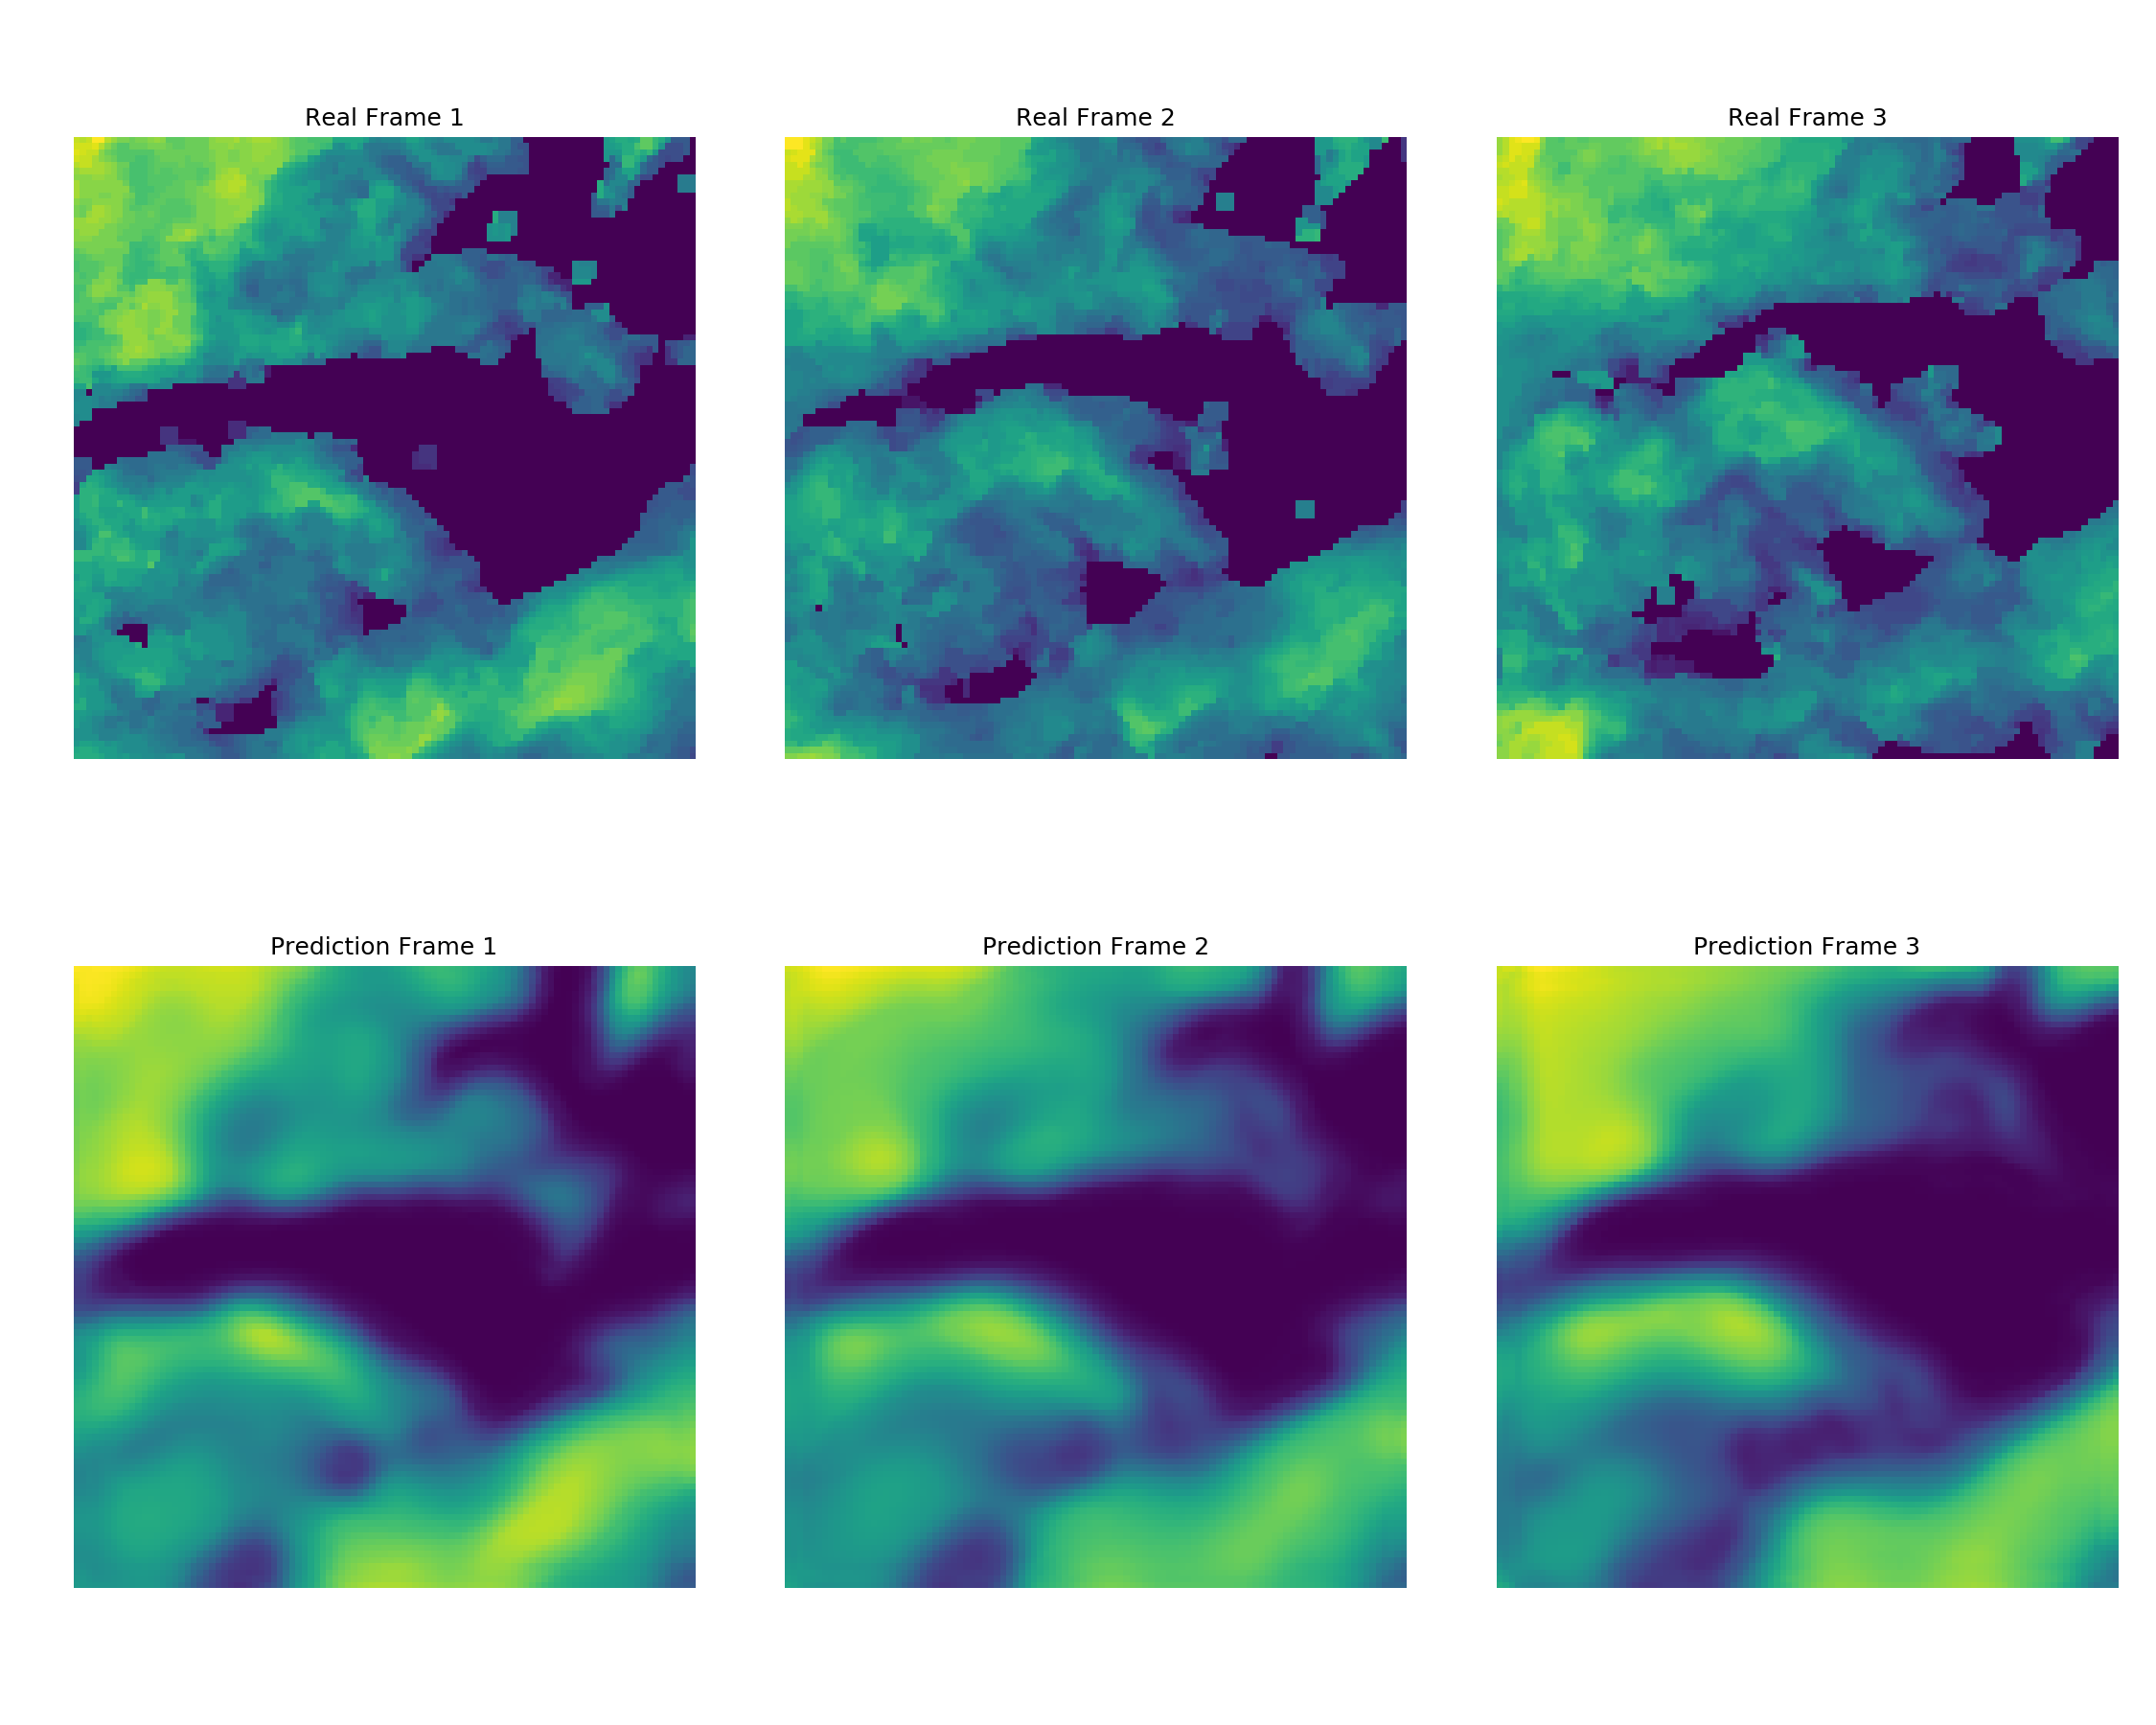

In [11]:
from IPython.display import Image
Image('Prediction0_Height2_3ims.png')  